In [2]:
import sys
sys.path.append('../..')

In [3]:
import matplotlib.pyplot as plt
import numpy as np

hydrophobicities = np.load('ligand_buriedness.npy')
hydrophobicities[0][0]

1.434337559843957

In [4]:
buriedness_list = [buriedness[0] for buriedness in hydrophobicities]

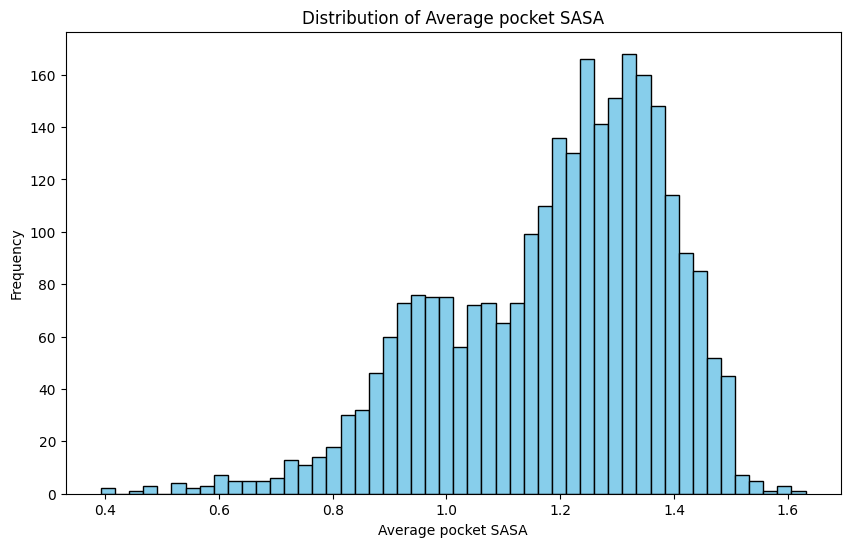

1.3215900871257231


In [5]:
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(buriedness_list, bins=50, color='skyblue', edgecolor='black')
peak_index = np.argmax(counts)
peak_x = (bins[peak_index] + bins[peak_index + 1]) / 2
plt.title('Distribution of Average pocket SASA')
plt.xlabel('Average pocket SASA')
plt.ylabel('Frequency')
plt.show()
print(peak_x)

In [5]:
counts, bins

(array([  2.,   0.,   1.,   3.,   0.,   4.,   2.,   3.,   7.,   5.,   5.,
          5.,   6.,  13.,  11.,  14.,  18.,  30.,  32.,  46.,  60.,  73.,
         76.,  75.,  75.,  56.,  72.,  73.,  65.,  73.,  99., 110., 136.,
        130., 166., 141., 151., 168., 160., 148., 114.,  92.,  85.,  52.,
         45.,   7.,   5.,   1.,   3.,   1.]),
 array([0.39282179, 0.41758895, 0.4423561 , 0.46712326, 0.49189041,
        0.51665757, 0.54142472, 0.56619187, 0.59095903, 0.61572618,
        0.64049334, 0.66526049, 0.69002765, 0.7147948 , 0.73956196,
        0.76432911, 0.78909626, 0.81386342, 0.83863057, 0.86339773,
        0.88816488, 0.91293204, 0.93769919, 0.96246635, 0.9872335 ,
        1.01200066, 1.03676781, 1.06153496, 1.08630212, 1.11106927,
        1.13583643, 1.16060358, 1.18537074, 1.21013789, 1.23490505,
        1.2596722 , 1.28443936, 1.30920651, 1.33397366, 1.35874082,
        1.38350797, 1.40827513, 1.43304228, 1.45780944, 1.48257659,
        1.50734375, 1.5321109 , 1.55687806, 1.

In [6]:
from lib.pdb import get_all_pdb_names

In [15]:
hydrophobic = []
hydrophilic = []
neutral = []

for pdb_name, hydrophobicity in zip(get_all_pdb_names(), buriedness_list):
    if hydrophobicity > 1.1:
        hydrophobic.append(pdb_name)
    else:
        hydrophilic.append(pdb_name)

In [11]:
hydrophobic = []
hydrophilic = []
neutral = []

for pdb_name, hydrophobicity in zip(get_all_pdb_names(), buriedness_list):
    if hydrophobicity > 1.3 and hydrophobicity < 1.35:
        hydrophobic.append(pdb_name)
    elif hydrophobicity > 0.9 and hydrophobicity < 0.95:
        hydrophilic.append(pdb_name)

In [8]:
hydrophilic

['4sga',
 '1a1e',
 '1a30',
 '1a4k',
 '1a94',
 '1a9m',
 '1aaq',
 '2p3a',
 '2p3b',
 '2p3c',
 '2p3i',
 '2pcp',
 '2pk5',
 '2pk6',
 '3kqr',
 '3l4x',
 '3ljo',
 '4alx',
 '4asd',
 '4ase',
 '4att',
 '4auj',
 '4av4',
 '4av5',
 '4qd6',
 '4qgi',
 '4qxo',
 '1o3l',
 '1oar',
 '1oau',
 '1ogd',
 '5cs6',
 '1wuq',
 '1wur',
 '1xk5',
 '1xk9',
 '3djk',
 '3djp',
 '3djq',
 '3djv',
 '3djx',
 '3dk1',
 '3dri',
 '3e6y',
 '3eax',
 '3eb1',
 '2wkz',
 '2wl0',
 '3s43',
 '4gj3',
 '4gqp',
 '4gzw',
 '4gzx',
 '4h75',
 '5upj',
 '6upj',
 '7upj',
 '1hih',
 '1hii',
 '1hos',
 '1hpo',
 '1hps',
 '1hpv',
 '1hpx',
 '1hsh',
 '1hvh',
 '1hvi',
 '1hvj',
 '1hvk',
 '1hvl',
 '1hvs',
 '1hwr',
 '1hxb',
 '1hxw',
 '4ll3',
 '4loh',
 '4loi',
 '4lvt',
 '4x5p',
 '4x5q',
 '4x5r',
 '4x5z',
 '4xo8',
 '2e27',
 '3ggu',
 '3gi4',
 '3gi5',
 '3gi6',
 '3gs6',
 '3gsm',
 '3h5b',
 '3h89',
 '3h8b',
 '3uyr',
 '3v2n',
 '3v2p',
 '3v2q',
 '4der',
 '4des',
 '4det',
 '4dew',
 '4dhl',
 '4djo',
 '4djp',
 '4djq',
 '4djr',
 '4dju',
 '1lkk',
 '1lkl',
 '1lyb',
 '1lzq',
 

In [11]:
protein_names = get_all_pdb_names()

In [12]:
protein_names[buriedness_list.index(max(buriedness_list))],protein_names[buriedness_list.index(min(buriedness_list))]

('1l83', '3usx')

In [16]:
len(hydrophilic) ,len(hydrophobic), len(neutral)

(796, 1923, 0)

In [17]:
with open('../../../data/pdb_group/buriedness_high_1.1_pdb', mode='w') as f:
    for pdb in hydrophobic:
        f.write(pdb + '\n')

In [18]:
with open('../../../data/pdb_group/buriedness_low_1.1_pdb', mode='w') as f:
    for pdb in hydrophilic:
        f.write(pdb + '\n')

In [93]:
with open('../../data/neutral_500_pdb', mode='w') as f:
    for pdb in neutral:
        f.write(pdb + '\n')

In [11]:
with open('../../../data/train_list', mode='r') as f:
    train_pdb_list = f.read().splitlines()
with open('../../../data/val_list', mode='r') as f:
    val_pdb_list = f.read().splitlines()
train_pdb_set = set(train_pdb_list)
val_pdb_set = set(val_pdb_list)

In [19]:
with open('../../../data/test_list', mode='r') as f:
    test_pdb_list = f.read().splitlines()

test_pdb_set = set(test_pdb_list)

In [20]:
hydrophobic_set = set(hydrophobic)
hydrophilic_set = set(hydrophilic)
# neutral_set = set(neutral)

In [13]:
test_hydrophobic = list(((train_pdb_set | val_pdb_set) & hydrophobic_set))
test_hydrophilic = list(((train_pdb_set | val_pdb_set) & hydrophilic_set))
# test_neutral = list(((train_pdb_set | val_pdb_set) & neutral_set))

In [21]:
test_hydrophobic = list((test_pdb_set  & hydrophobic_set))
test_hydrophilic = list((test_pdb_set  & hydrophilic_set))

In [14]:
with open('../../../data/test_buriedness_high_1.1_pdb', mode='w') as f:
    for pdb in test_hydrophobic:
        f.write(pdb + '\n')

In [24]:
with open('../../../data/test_buriedness_low_1.1_pdb', mode='w') as f:
    for pdb in test_hydrophilic:
        f.write(pdb + '\n')

In [98]:
with open('../../data/test_neutral_500_pdb', mode='w') as f:
    for pdb in test_neutral:
        f.write(pdb + '\n')